# Data Cleaning Module

### Our second phase entails the data cleaning process.

### Check for Duplicates

In [752]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', 100)

# display plots in the notebook
%matplotlib inline

# load the real estate data
df = pd.read_csv('data_aos_modified_2.csv')

In [753]:
# Drop duplicates and check on the data frame's shape for differences
df.shape

(6000, 17)

In [754]:
df = df.drop_duplicates()
df.shape

(5786, 17)

### Removing Outliers

#### Objectives
* Check for unlikely to be real datas
* Remove real estates that are too pricey, luxury that pertain to a different category.


In [755]:
#getting rid of ads that didn't put most of their essential information 

df = df.dropna(thresh=df.shape[1] - 3)
df.shape

(5786, 17)

In [756]:
### getting rid of unnecessary words
df['Талбай:'] = df['Талбай:'].str.replace('м²', '').str.strip()
df['Талбай:'] = pd.to_numeric(df['Талбай:'], errors='coerce')


In [757]:
df['Талбай:'].describe()

count    5786.000000
mean       84.003715
std        46.438776
min         0.000000
25%        53.000000
50%        72.000000
75%       104.000000
max       426.000000
Name: Талбай:, dtype: float64

In [758]:
## divide by 1 million to get an easy to work with data
df['үнэ'] = df['үнэ'] / 1e6

In [759]:
df[df['Талбай:'] <= 15]

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
1436,199.0,"УБ — Баянгол, Төмөр зам",Паркет,1 тагттай,1995,Байхгүй,Вакум,9,Төмөр,0.0,8,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
2588,200.0,"УБ — Сонгинохайрхан, 1-р хороолол",Паркет,2 тагттай,1998,Байхгүй,Вакум,9,Бүргэд,0.0,9,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
2822,918.0,"УБ — Хан-Уул, Зайсан",Паркет,2 тагттай,2021,Байгаа,Вакум,9,Бүргэд,1.0,5,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
2987,54.0,"Орхон, Орхон",Паркет,Тагтгүй,1994,Байхгүй,Вакум,4,Бүргэд,12.0,1,Лизинггүй,1,Ашиглалтад орсон,NaN,NaN,NaN
3223,233.2,"УБ — Хан-Уул, 19-р хороолол",Паркет,1 тагттай,2021,Байхгүй,Вакум,16,Бүргэд,0.0,7,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
3248,128.0,"УБ — Баянзүрх, Их Монгол хороолол",Паркет,Тагтгүй,2016,Байхгүй,Вакум,10,Бүргэд,3.0,6,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
3831,3.1,"УБ — Баянзүрх, Өгөөмөр захын зүүн",Паркет,1 тагттай,2024,Байхгүй,Вакум,12,Төмөр вакум,1.8,10,Лизинггүй,4,Ашиглалтад орсон,NaN,NaN,NaN
4516,98.0,"УБ — Баянгол, 3, 4 хороолол",Паркет,1 тагттай,1996,Байхгүй,Вакум,9,Бүргэд,15.0,3,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
5019,115.0,"УБ — Сонгинохайрхан, 21-р хороолол",Паркет,1 тагттай,1996,Байхгүй,Вакум,9,Бүргэд,0.0,4,Лизинггүй,3,Ашиглалтад орсон,NaN,NaN,NaN
5426,200.0,"УБ — Баянзүрх, 13-р хороолол",Паркет,1 тагттай,1996,Байхгүй,Вакум,9,Бүргэд,5.0,5,Банкны лизингтэй,3,Ашиглалтад орсон,NaN,NaN,NaN


In [760]:
# If floor of the apartment is higher than total floor it's a wrong info

df = df[(df['Барилгын давхар:'] >= df['Хэдэн давхарт:'])]

In [761]:
df = df[df['Талбай:'] > 10 ]

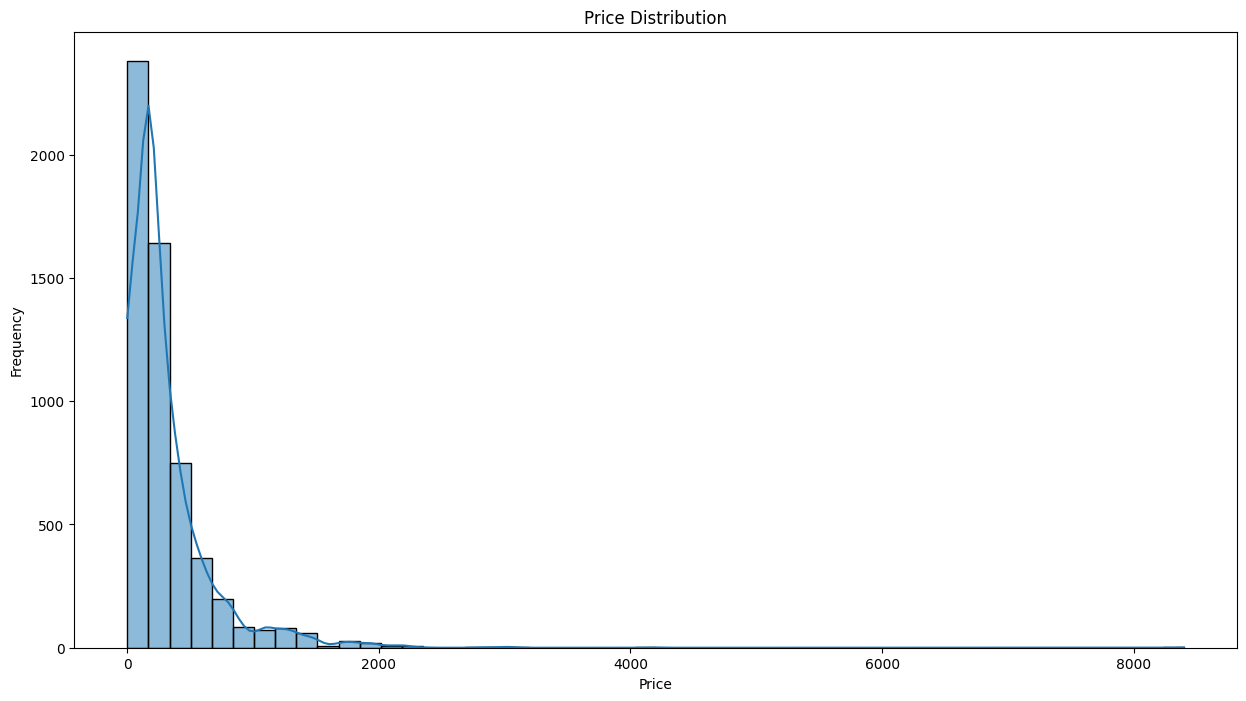

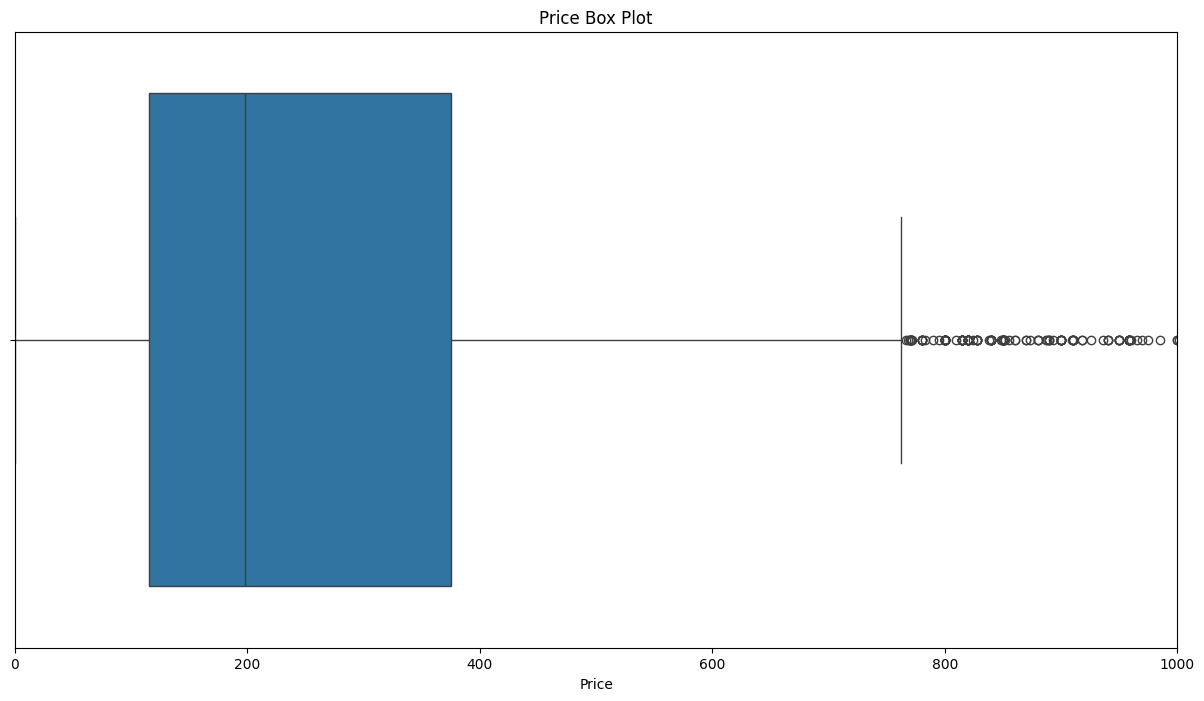

In [762]:

# Histogram for 'price'
plt.figure(figsize=(15, 8))
sns.histplot(df['үнэ'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['үнэ'])
plt.xlim(0, 1000) 
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


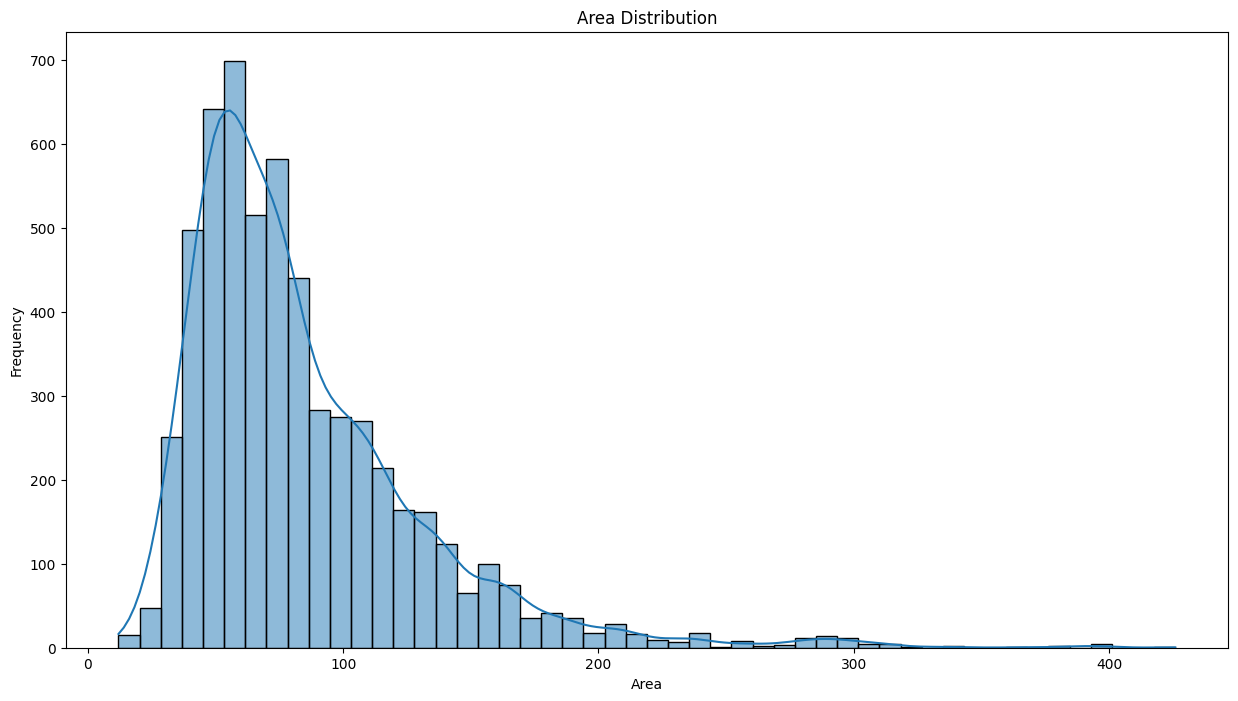

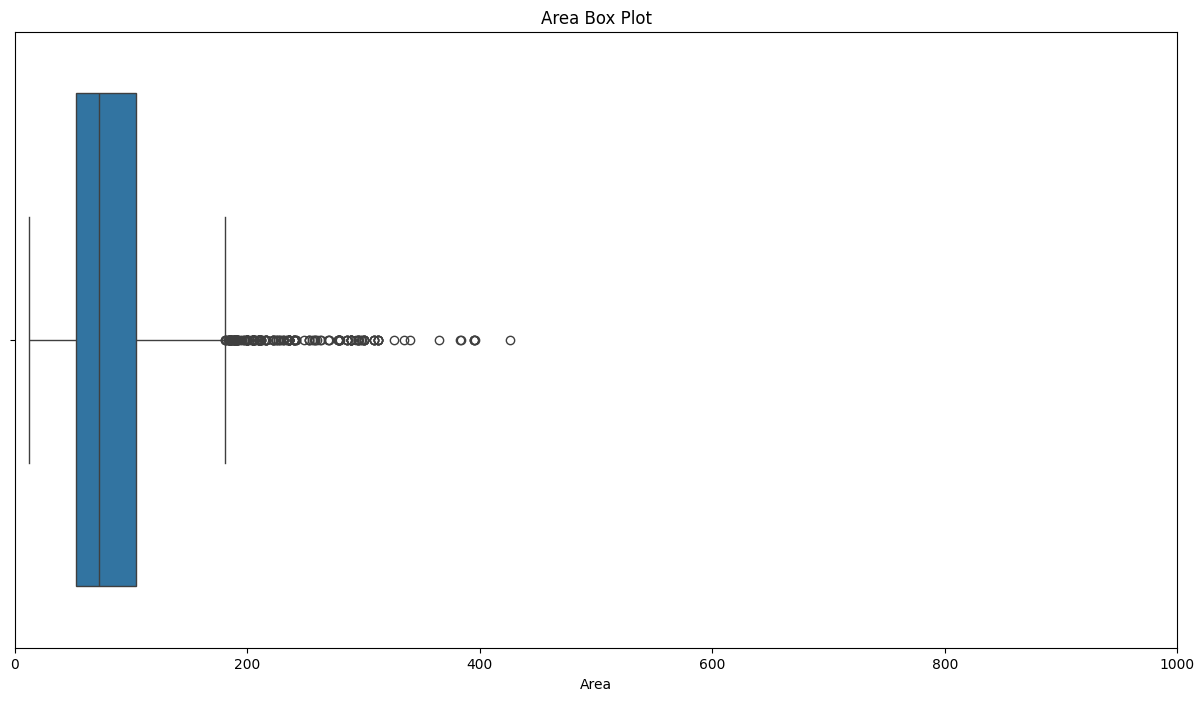

In [763]:

# Histogram for 'area'
plt.figure(figsize=(15, 8))
sns.histplot(df['Талбай:'], bins=50, kde=True)
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'area'
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['Талбай:'])
plt.xlim(0, 1000) 
plt.title('Area Box Plot')
plt.xlabel('Area')
plt.show()


In [764]:
df['үнэ'].describe()

count    5698.000000
mean      300.583386
std       356.762381
min         0.000400
25%       115.000000
50%       197.768500
75%       375.000000
max      8400.000000
Name: үнэ, dtype: float64

In [765]:
df[df['үнэ'] / df['Талбай:'] < 1].describe()

,үнэ,Ашиглалтанд орсон он:,Барилгын давхар:,Талбай:,Хэдэн давхарт:,Цонхны тоо:,Код:
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,0.0
mean,4.165876,2020.403071,14.211132,89.496727,7.939539,3.751440,NaN
std,1.867818,5.087015,4.696714,44.812060,4.832168,1.522998,NaN
min,0.000400,1982.000000,2.000000,29.500000,1.000000,1.000000,NaN
25%,3.000000,2018.000000,12.000000,56.765000,4.000000,3.000000,NaN
50%,3.600000,2023.000000,16.000000,77.000000,7.000000,4.000000,NaN
75%,4.900000,2024.000000,16.000000,112.000000,11.000000,5.000000,NaN
max,35.000000,2025.000000,25.000000,383.300000,25.000000,8.000000,NaN


In [766]:
df = df[df['үнэ'] > 0.000400]

In [767]:
# Replace price with price times area if price / area < 1
condition = df['үнэ'] / df['Талбай:'] < 1
df.loc[condition, 'үнэ'] = df.loc[condition, 'үнэ'] * df.loc[condition, 'Талбай:']
df['үнэ'].describe()


count    5697.000000
mean      373.974222
std       362.986982
min        45.000000
25%       163.000000
50%       250.000000
75%       450.000000
max      8400.000000
Name: үнэ, dtype: float64

In [768]:
iqr = 450 - 163

upper_bound = 450 + 1.5 * iqr
print('upper bound is', upper_bound)

upper bound is 880.5


In [769]:

outlier_count = (df['үнэ'] >= upper_bound).sum()
outlier_count

411

In [770]:
wo = df[df['үнэ'] <= upper_bound]
wo['үнэ'].describe()

count    5286.000000
mean      296.759571
std       183.313494
min        45.000000
25%       160.000000
50%       235.000000
75%       389.000000
max       880.000000
Name: үнэ, dtype: float64

In [771]:
wo[(wo['үнэ'] > 50) & (wo['үнэ'] < 100)].describe()

,үнэ,Ашиглалтанд орсон он:,Барилгын давхар:,Талбай:,Хэдэн давхарт:,Цонхны тоо:,Код:
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,0.0
mean,84.146243,2013.650943,9.867925,33.645236,5.783019,1.797170,NaN
std,11.666951,10.031743,4.494495,9.332541,3.778223,0.696226,NaN
min,52.000000,1980.000000,2.000000,12.000000,1.000000,1.000000,NaN
25%,75.000000,2010.000000,5.000000,28.975000,3.000000,1.000000,NaN
50%,88.000000,2014.000000,10.000000,32.000000,5.000000,2.000000,NaN
75%,95.000000,2022.250000,14.250000,37.567500,8.000000,2.000000,NaN
max,99.989100,2025.000000,17.000000,75.000000,16.000000,4.000000,NaN


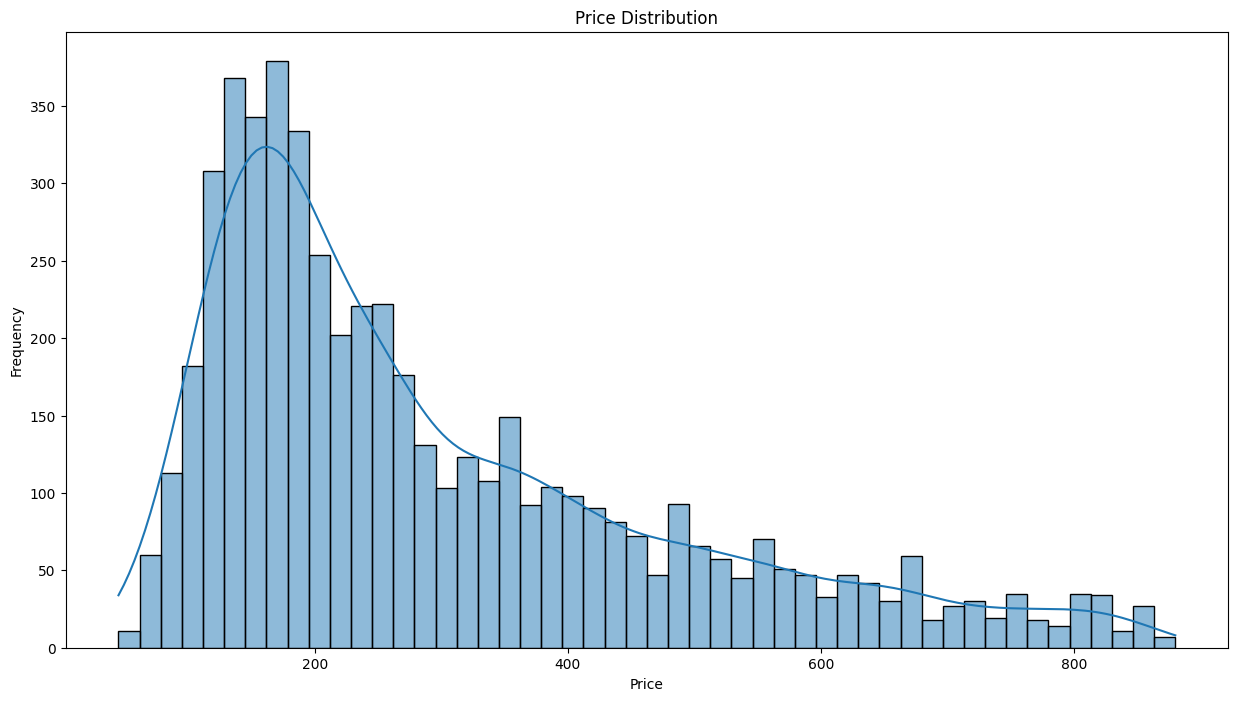

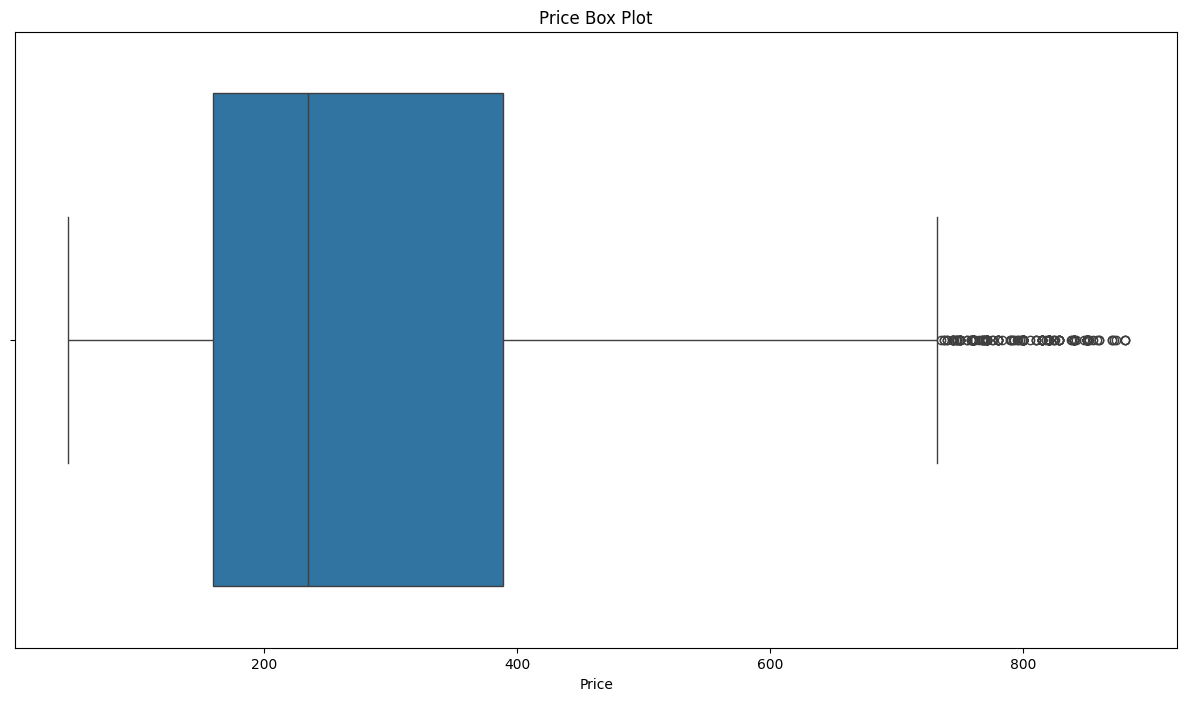

In [772]:

# Histogram for 'price' after outlier removal 
plt.figure(figsize=(15, 8))
sns.histplot(wo['үнэ'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'price'
plt.figure(figsize=(15, 8))
sns.boxplot(x=wo['үнэ'])
plt.title('Price Box Plot')
plt.xlabel('Price')
plt.show()


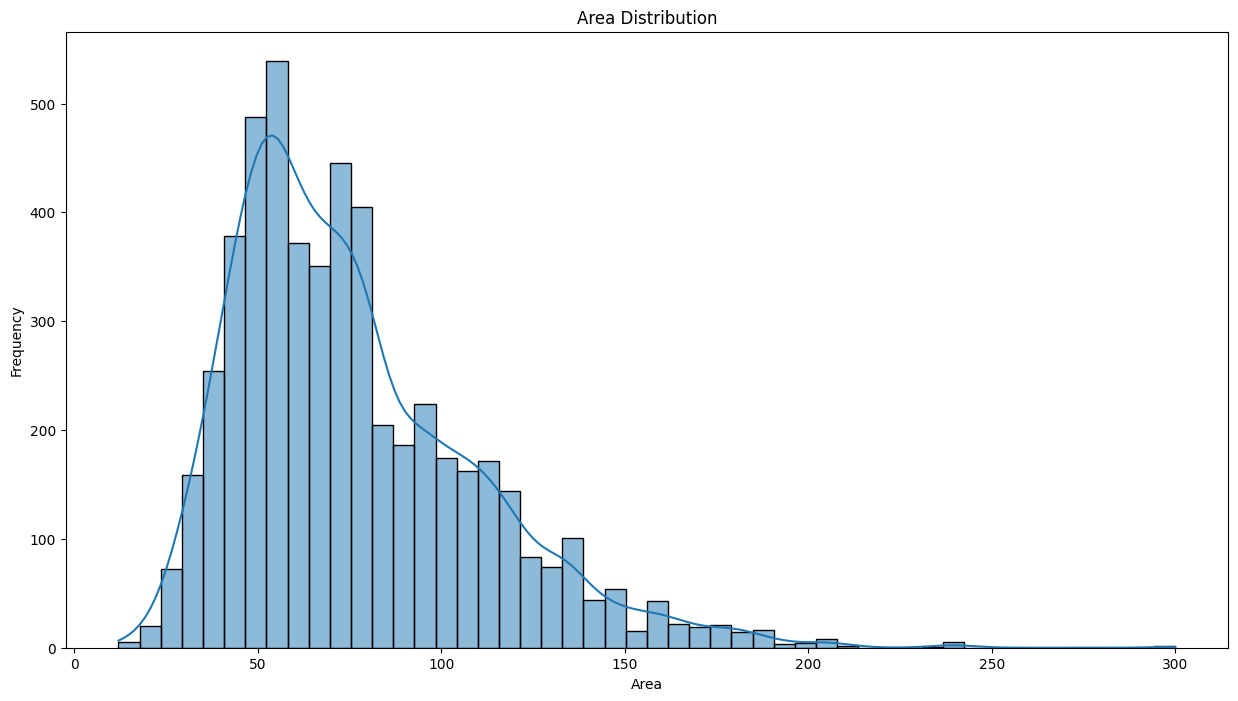

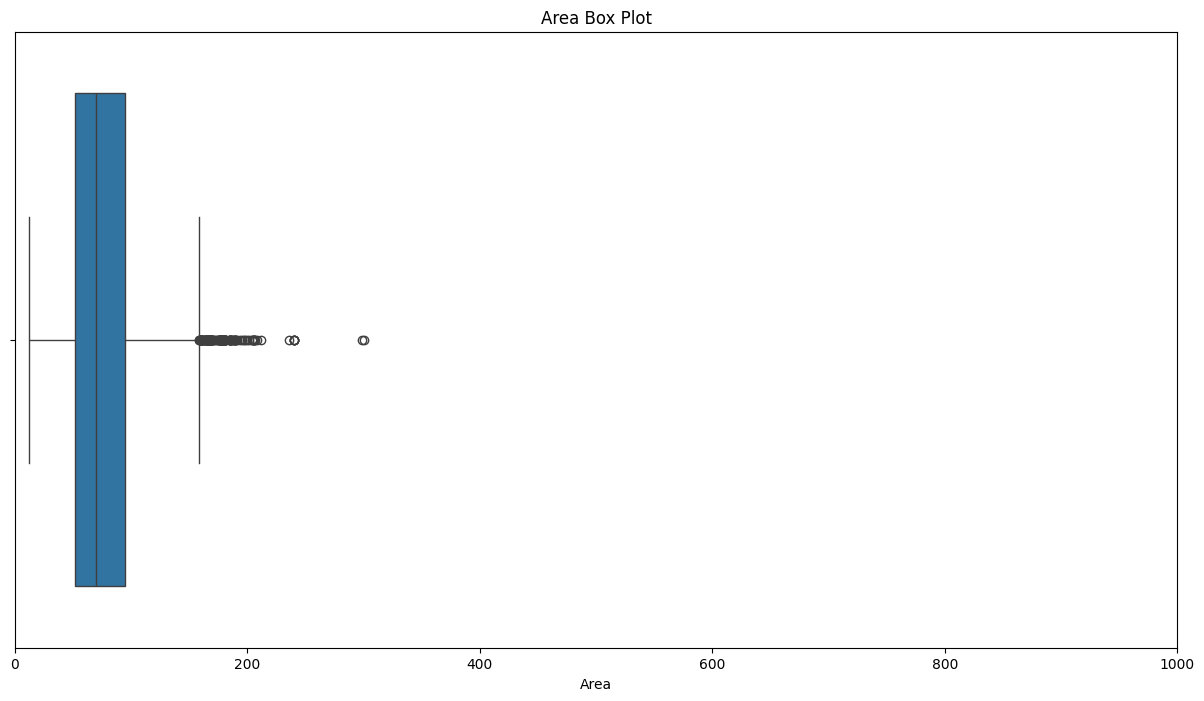

In [773]:

# Histogram for 'area' after outlier removal
plt.figure(figsize=(15, 8))
sns.histplot(wo['Талбай:'], bins=50, kde=True)
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'area' after outlier removal 
plt.figure(figsize=(15, 8))
sns.boxplot(x=wo['Талбай:'])
plt.xlim(0, 1000) 
plt.title('Area Box Plot')
plt.xlabel('Area')
plt.show()


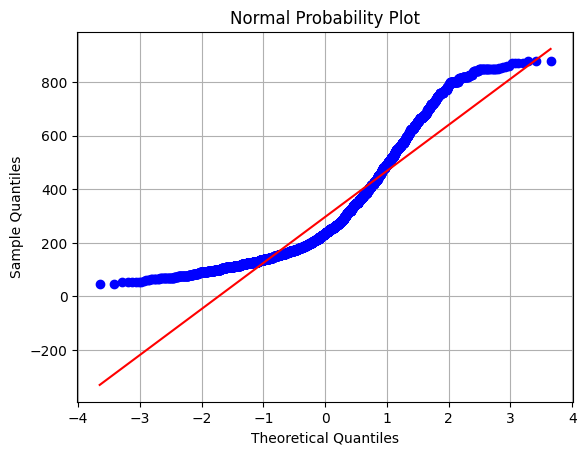

In [774]:
from scipy.stats import probplot

# Create the normal probability plot
target_data = wo['үнэ']
probplot(target_data, plot=plt)

# Show the plot
plt.title("Normal Probability Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

In [775]:
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,Тагтгүй,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1 тагттай,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,Тагтгүй,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2 тагттай,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


In [776]:
# To count different values of floor
df['Шал:'].value_counts()


Шал:
Паркет     5496
Ламинат      81
Мод          75
Цемент       25
Плита        15
Чулуу         5
Name: count, dtype: int64

In [777]:
# To count different values of address
wo['хаяг'].value_counts()


хаяг
УБ — Хан-Уул, Яармаг                       504
УБ — Хан-Уул, Зайсан                       362
УБ — Баянзүрх, Баянзүрх, Хороо 26          300
УБ — Хан-Уул, Нисэх                        176
УБ — Хан-Уул, Хан-Уул, Хороо 15            146
                                          ... 
УБ — Баянгол, Баянгол, Хороо 14              1
УБ — Баянзүрх, 84-р сургуулийн ойролцоо      1
УБ — Баянгол, Баянгол, Хороо 5               1
УБ — Баянзүрх, Баянзүрх, Хороо 20            1
УБ — Сонгинохайрхан, Толгойт                 1
Name: count, Length: 261, dtype: int64

In [778]:
# To count different values of windows
wo['Цонх:'].value_counts()

Цонх:
Вакум          5095
Төмөр вакум     115
Модон вакум      46
Мод              30
Name: count, dtype: int64

### Structural Errors

* Replace any null variables to zero if applicable
* Fix any typos and capitalization errors 

In [779]:
#replace NaN values with 0 for garage
wo['Гараж:'] = wo['Гараж:'].fillna(0)
wo.head()

/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3509/4115155570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo['Гараж:'] = wo['Гараж:'].fillna(0)


,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,Тагтгүй,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1 тагттай,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1 тагттай,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,Тагтгүй,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2 тагттай,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


In [780]:
wo.shape

(5286, 17)

In [781]:
#getting rid of unnecessary words
wo['Тагт:'] = wo['Тагт:'].fillna('0')
wo['Тагт:'] = wo['Тагт:'].str.replace('тагттай', '').str.strip()
wo['Тагт:'] = wo['Тагт:'].str.replace('Тагтгүй', '0').str.strip()
wo['Тагт:'] = wo['Тагт:'].str.replace('3+', '3').str.strip()
wo['Талбай:'] = pd.to_numeric(wo['Талбай:'], errors='coerce')

wo.head()

/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3509/2453545938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo['Тагт:'] = wo['Тагт:'].fillna('0')
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3509/2453545938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo['Тагт:'] = wo['Тагт:'].str.replace('тагттай', '').str.strip()
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3509/2453545938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,0,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,0,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


In [782]:
#checking if they have been removed correctly 
count = wo['Тагт:'].value_counts()
count

Тагт:
1    4152
2     654
0     423
3      57
Name: count, dtype: int64

In [783]:
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,0,2013,Байхгүй,Вакум,5,Бүргэд,30.50,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1,1990,Байхгүй,Вакум,5,Бүргэд,16.00,5,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1,2010,Байхгүй,Вакум,10,Бүргэд,150.00,10,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,0,2021,Байхгүй,Вакум,12,Вакум,39.98,2,Лизинггүй,2,Ашиглалтад орсон,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2,2016,Байгаа,Вакум,16,Бүргэд,115.86,7,Лизинггүй,5,Ашиглалтад орсон,NaN,NaN,NaN


# Label Encoding

* Binary classifying for features that have either true or false value.

In [784]:
#mapping values 

mapping = {
    'Банкны лизингтэй': '1',
    'Лизинггүй' : '0',
    'Хувь лизингтэй' : '1'
}
garagemap = {
    'Байхгүй' : '0',
    'Байгаа' : '1',
}
usagemap = {
    'Ашиглалтад орсон' : '1',
    'Ашиглалтад ороогүй': '0',
}
wo['Гараж:'] = wo['Гараж:'].str.strip()
wo['Гараж:'] = wo['Гараж:'].map(garagemap)

wo['Лизингээр авах боломж:'] = wo['Лизингээр авах боломж:'].str.strip()
wo['Лизингээр авах боломж:'] = wo['Лизингээр авах боломж:'].map(mapping)

wo['Барилгын явц:'] = wo['Барилгын явц:'].str.strip()
wo['Барилгын явц:'] = wo['Барилгын явц:'].map(usagemap)


wo.head()

/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3509/2014148866.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo['Гараж:'] = wo['Гараж:'].str.strip()
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3509/2014148866.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo['Гараж:'] = wo['Гараж:'].map(garagemap)
/var/folders/k5/d_ccjpd550q3sskv2xjl_mxc0000gn/T/ipykernel_3509/2014148866.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:,Байршил:,Код:,location:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,0,2013,0,Вакум,5,Бүргэд,30.50,5,0,2,1,NaN,NaN,NaN
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1,1990,0,Вакум,5,Бүргэд,16.00,5,0,2,1,NaN,NaN,NaN
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1,2010,0,Вакум,10,Бүргэд,150.00,10,0,5,1,NaN,NaN,NaN
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,0,2021,0,Вакум,12,Вакум,39.98,2,0,2,1,NaN,NaN,NaN
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2,2016,1,Вакум,16,Бүргэд,115.86,7,0,5,1,NaN,NaN,NaN


In [785]:
wo.shape

(5286, 17)

In [786]:
wo.isnull().sum()

үнэ                          0
хаяг                         0
Шал:                         0
Тагт:                        0
Ашиглалтанд орсон он:        0
Гараж:                       0
Цонх:                        0
Барилгын давхар:             0
Хаалга:                      0
Талбай:                      0
Хэдэн давхарт:               0
Лизингээр авах боломж:       0
Цонхны тоо:                  0
Барилгын явц:                0
Байршил:                  5285
Код:                      5286
location:                 5285
dtype: int64

In [787]:
wo = wo.drop(columns= ['Байршил:', 'Код:', 'location:'])
wo.head()

,үнэ,хаяг,Шал:,Тагт:,Ашиглалтанд орсон он:,Гараж:,Цонх:,Барилгын давхар:,Хаалга:,Талбай:,Хэдэн давхарт:,Лизингээр авах боломж:,Цонхны тоо:,Барилгын явц:
0,84.000,"УБ — Хан-Уул, Viva city",Паркет,0,2013,0,Вакум,5,Бүргэд,30.50,5,0,2,1
1,115.000,"УБ — Хан-Уул, 19-р хороолол",Паркет,1,1990,0,Вакум,5,Бүргэд,16.00,5,0,2,1
2,510.000,"УБ — Баянзүрх, Чингис зочид буудал",Паркет,1,2010,0,Вакум,10,Бүргэд,150.00,10,0,5,1
3,107.946,"УБ — Хан-Уул, Хан-Уул, Хороо 16",Паркет,0,2021,0,Вакум,12,Вакум,39.98,2,0,2,1
4,521.370,"УБ — Баянзүрх, Баянзүрх, Хороо 26",Паркет,2,2016,1,Вакум,16,Бүргэд,115.86,7,0,5,1


In [788]:
wo.shape

(5286, 14)

# Import the cleaned data to a new csv.

In [789]:
wo.to_csv('cleaned_data.csv', index=False)